# Exploratory Data Analysis (EDA)

In this notebook, we visualize the sales data to understand trends, seasonality, and key drivers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.1)

In [2]:
# Load processed data
data_path = "../data/processed_superstore.csv"
if not os.path.exists(data_path):
    data_path = "../../data/processed_superstore.csv" # Fallback if running from different dir

df = pd.read_csv(data_path)
df['order_date'] = pd.to_datetime(df['order_date'])

# Load aggregated monthly data
monthly_path = "../data/monthly_sales.csv"
if not os.path.exists(monthly_path):
    monthly_path = "../../data/monthly_sales.csv"
    
df_monthly = pd.read_csv(monthly_path)
df_monthly['order_date'] = pd.to_datetime(df_monthly['order_date'])
df_monthly.set_index('order_date', inplace=True)

print("Data loaded.")
print(df_monthly.head())

Data loaded.
                sales
order_date           
2014-01-31  14236.895
2014-02-28   4519.892
2014-03-31  55691.009
2014-04-30  28295.345
2014-05-31  23648.287


## 1. Sales Trend Over Time (Monthly)

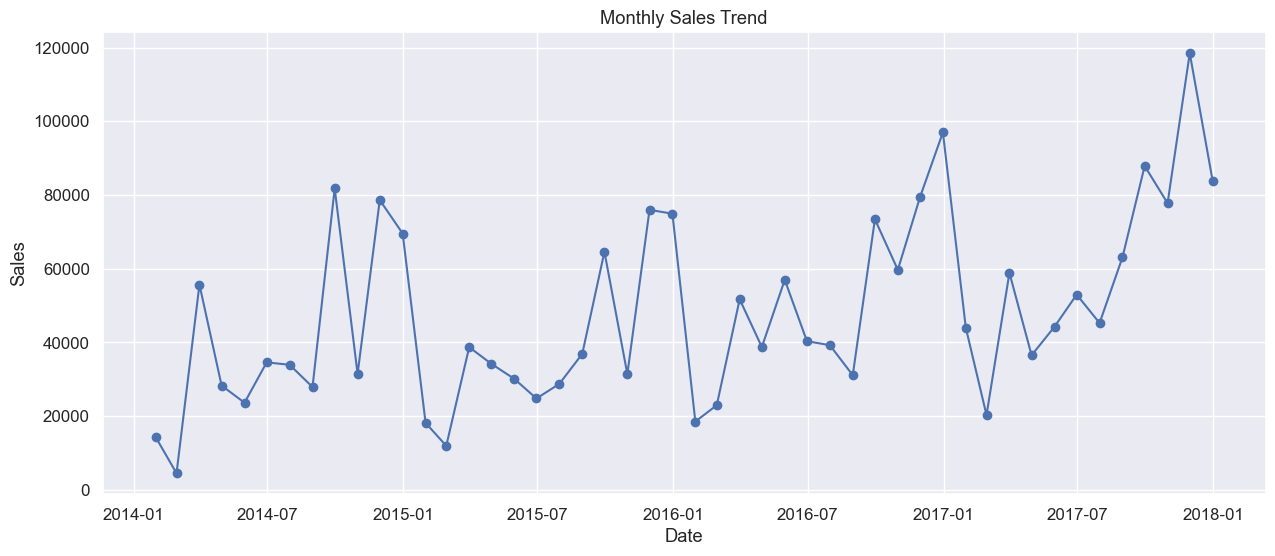

In [3]:
plt.figure(figsize=(15, 6))
plt.plot(df_monthly.index, df_monthly['sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

## 2. Top Performing Categories

C:\Users\rolir\AppData\Local\Temp\ipykernel_21944\3616207725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_sales.index, y=cat_sales.values, palette='viridis')


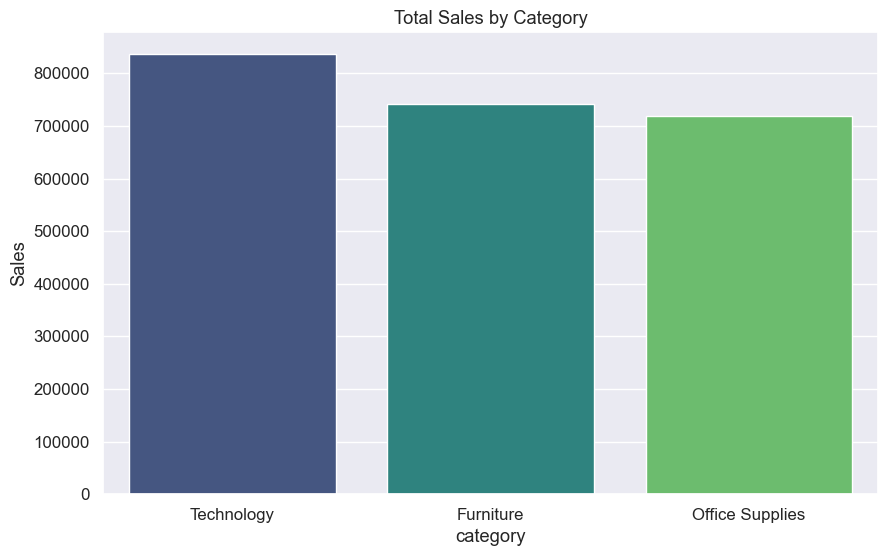

In [4]:
cat_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=cat_sales.index, y=cat_sales.values, palette='viridis')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.show()

## 3. Seasonality Decomposition

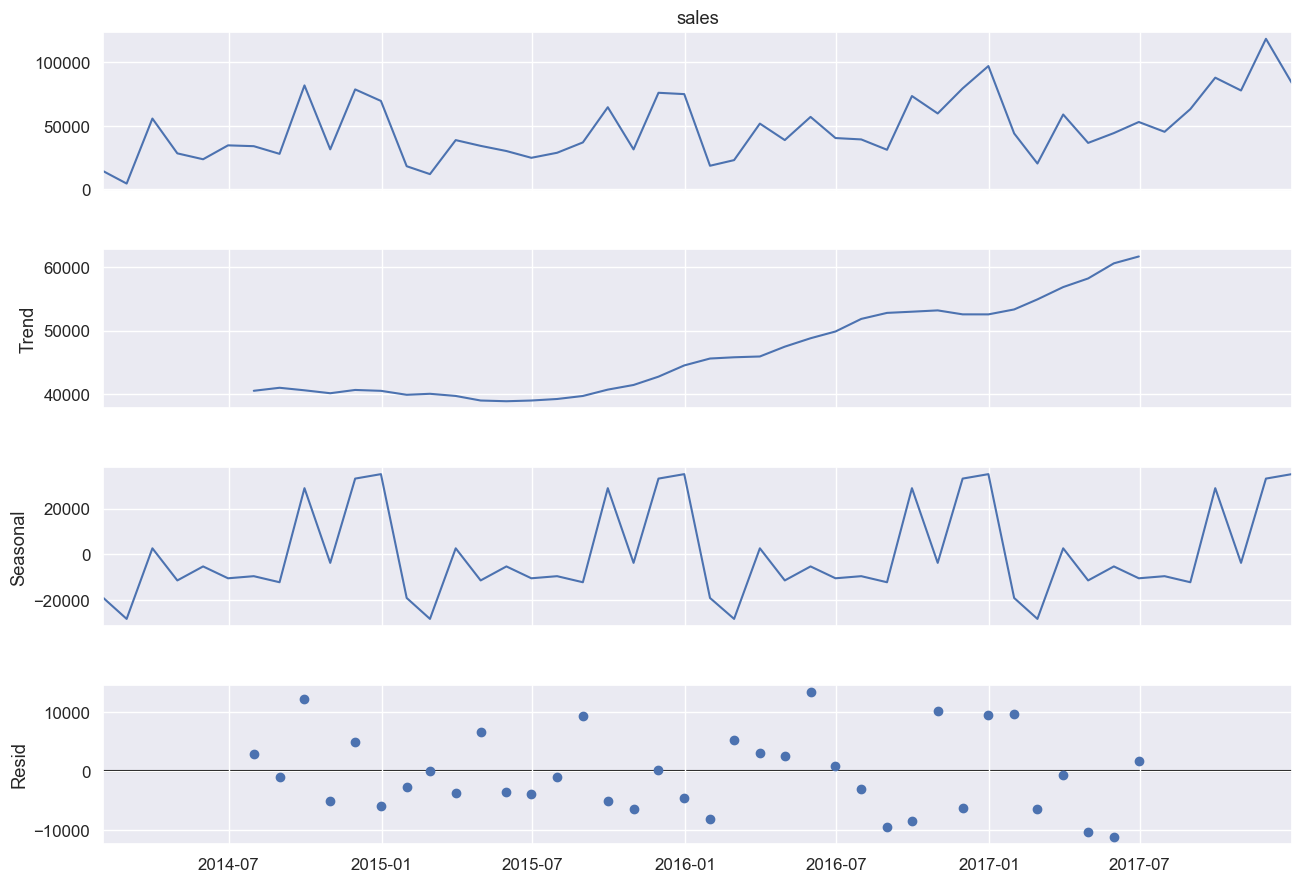

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_monthly['sales'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()